<a href="https://colab.research.google.com/github/JorgeICS/Primeos_Analisis_Geopandas/blob/filtro-por-Nodos-simplificado/filtrado_nodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas pandas matplotlib

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CF_todas_simp = gpd.read_file('/content/drive/MyDrive/Carreteras/filtradas/CF_todas_simp.geojson')

In [237]:
CF_con_ID = gpd.read_file('/content/drive/MyDrive/Carreteras/filtradas/Carreteras_con_ID (2).geojson')

In [ ]:
sin_nombre = gpd.read_file('/content/drive/MyDrive/Carreteras/filtradas/carreteras_sin_Nombre (1).geojson')

In [238]:
sin_ID = CF_todas_simp.loc[(CF_todas_simp['NOMBRE']=='nd')]

In [239]:
sin_ID.shape

(1000, 23)

In [ ]:
#  QUITAR TODOS LOS DATOS QUE SON =  'nd' de la columna NOMBRE en CF_todas_simp Y poneros en la variable CF_con_ID

CF_con_ID = CF_todas_simp.loc[(CF_todas_simp['NOMBRE']!='nd')]


In [240]:
CF_con_ID.shape

(114586, 23)

#Etiqueta y filtro por nodos

## Iteracion 1 conex inicial - conex final

In [241]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [242]:


for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [243]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']

In [244]:
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']

In [245]:
nuevos_ID=sin_ID.loc[sin_ID['NOMBRE']!='nd']

In [246]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [247]:
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)


In [248]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [249]:
CF_con_ID.shape

(114606, 23)

In [250]:
sin_ID.shape

(980, 25)

In [251]:
nuevos_ID.shape

(20, 25)

## Iteracion 2 conex inicial - conex final

In [252]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

In [253]:


for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [254]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']

In [255]:
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']

In [256]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [257]:
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
5394,92720,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1541406,1539617,385.048185,8.0,2021-04-23 09:40:20,Definida,"LINESTRING (-98.83183 19.22225, -98.83187 19.2...",mexico-cuautla,mexico-cuautla
72874,889249,Carretera,guadalajara-tepic,15,Con pavimento,Concreto,2,Habilitado,En operación,0,...,60,1636214,1797127,437.914555,7.0,2023-07-05 13:18:24,Definida,"LINESTRING (-103.60436 20.73253, -103.60489 20...",guadalajara-tepic,guadalajara-tepic
104672,2340349,Carretera,hermosillo-nogales,N/D,Con pavimento,Concreto,1,Habilitado,En operación,0,...,90,1415009,1415203,103.738753,3.5,2019-08-29 11:42:08,Definida,"LINESTRING (-110.99516 30.61871, -110.99499 30...",hermosillo-nogales,hermosillo-nogales


In [258]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [259]:
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)


In [260]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [261]:
CF_con_ID.shape

(114609, 23)

In [262]:
sin_ID.shape

(977, 25)

In [263]:
nuevos_ID.shape

(23, 25)

Menos 23 resultados despues de la iteracion 1 y 2

#Filtrado por CODIGO

In [264]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [265]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
348,12282,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1490451,1490452,94.412797,6.5,2019-08-20 09:30:40,Definida,"LINESTRING (-101.71389 17.83510, -101.71389 17...",nd,zihuatanejo-la_mira
504,13235,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1491011,1491012,128.940923,6.5,2020-10-12 11:07:39,Definida,"LINESTRING (-101.70545 17.80985, -101.70532 17...",nd,zihuatanejo-la_mira
599,13708,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1490191,1491225,97.298915,4.5,2020-10-12 12:42:38,Definida,"LINESTRING (-101.86549 17.95530, -101.86628 17...",zihuatanejo-la_mira,nd
686,14142,Carretera,ciudad_altamirano-tc_zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1491389,3081,59.131916,6.5,2020-10-12 13:34:28,Definida,"LINESTRING (-101.60717 17.72802, -101.60680 17...",ciudad_altamirano-tc_zihuatanejo-la_mira,nd
692,14176,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,2938,2939,272.670374,4.5,2020-10-12 12:28:38,Definida,"LINESTRING (-101.88435 17.96702, -101.88487 17...",nd,zihuatanejo-la_mira
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110033,2566405,Carretera,san_jose_del_cabo-aeropuerto_los_cabos,1,Con pavimento,Concreto,2,Habilitado,En operación,0,...,60,344488,344486,267.645030,7.0,2022-08-02 17:53:52,Aproximada,"LINESTRING (-109.74676 23.06859, -109.74658 23...",nd,san_jose_del_cabo-aeropuerto_los_cabos
110034,2566412,Carretera,san_jose_del_cabo-aeropuerto_los_cabos,1,Con pavimento,Concreto,2,Habilitado,En operación,0,...,60,344487,344492,158.804246,7.0,2023-07-05 13:18:24,Aproximada,"LINESTRING (-109.74619 23.06724, -109.74621 23...",san_jose_del_cabo-aeropuerto_los_cabos,nd
110751,2588971,Carretera,venta_de_carpio-tc_pachuca-tuxpam,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,386524,386525,375.087376,6.0,2021-09-10 10:33:49,Definida,"LINESTRING (-98.63377 19.88615, -98.63338 19.8...",nd,venta_de_carpio-tc_pachuca-tuxpam
111868,2626908,Carretera,las_varas-vallarta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,90,459407,457391,84.581812,7.0,2022-05-13 17:18:52,Aproximada,"LINESTRING (-105.24243 21.01363, -105.24251 21...",nd,las_varas-vallarta


In [266]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [267]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [268]:
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)

In [269]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [270]:
CF_con_ID.shape

(114766, 23)

In [271]:
sin_ID.shape

(820, 25)

In [272]:
nuevos_ID.shape

(180, 25)

## Iteracion 3 conex inicial - conex final

In [273]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

In [274]:


for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [275]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']

In [276]:
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
855,15020,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,2984,1490451,45.877789,7.0,2020-10-12 11:37:18,Definida,"LINESTRING (-101.71402 17.83549, -101.71397 17...",zihuatanejo-la_mira,zihuatanejo-la_mira
4807,81316,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1537809,1537810,274.361010,8.0,2021-04-23 14:37:38,Definida,"LINESTRING (-98.84116 19.22904, -98.83943 19.2...",mexico-cuautla,mexico-cuautla
4875,82257,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1538237,1538238,58.518570,8.0,2021-04-23 09:49:57,Definida,"LINESTRING (-98.85135 19.23681, -98.85117 19.2...",mexico-cuautla,mexico-cuautla
5081,85629,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1539301,1537271,285.492227,8.0,2021-04-23 15:29:47,Definida,"LINESTRING (-98.83896 19.22767, -98.83927 19.2...",mexico-cuautla,mexico-cuautla
5368,92304,Carretera,mexico-puebla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,80,8417,8415,78.225324,7.0,2013-10-11 10:28:28,Definida,"LINESTRING (-98.79832 19.31746, -98.79902 19.3...",mexico-puebla,mexico-puebla
6590,113164,Carretera,pachuca-tempoal,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1530551,1531527,155.321183,9.0,2021-06-23 12:10:47,Definida,"LINESTRING (-98.69265 20.14113, -98.69276 20.1...",pachuca-tempoal,pachuca-tempoal
10227,162918,Carretera,los_reyes-zacatepec,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,88748,88749,66.292856,4.0,2018-03-21 14:26:32,Definida,"LINESTRING (-97.82090 19.31036, -97.82152 19.3...",los_reyes-zacatepec,los_reyes-zacatepec
27264,306325,Carretera,valladolid-rio_lagartos,295,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1266091,1266092,33.538006,10.0,2017-06-09 13:40:09,Definida,"LINESTRING (-88.20281 20.72503, -88.20279 20.7...",valladolid-rio_lagartos,valladolid-rio_lagartos
27265,306326,Carretera,valladolid-rio_lagartos,295,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1266093,1266094,35.838300,10.0,2017-06-09 14:39:35,Definida,"LINESTRING (-88.20314 20.72532, -88.20317 20.7...",valladolid-rio_lagartos,valladolid-rio_lagartos
27267,306328,Carretera,valladolid-rio_lagartos,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1265660,1265933,14.927584,10.0,2014-03-11 13:46:17,Definida,"LINESTRING (-88.20306 20.72495, -88.20302 20.7...",valladolid-rio_lagartos,valladolid-rio_lagartos


In [277]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [278]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]


(805, 25)

In [279]:
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)

In [280]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [281]:
CF_con_ID.shape

(114781, 23)

In [282]:
sin_ID.shape

(805, 25)

In [283]:
nuevos_ID.shape

(195, 25)

195 resultados identificados hasta la iteracion 3

#Filtrado por CODIGO 2

In [284]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [285]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
475,13067,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1490918,2938,18.497015,4.5,2020-10-12 09:31:31,Definida,"LINESTRING (-101.88423 17.96690, -101.88435 17...",nd,zihuatanejo-la_mira
878,15151,Carretera,ciudad_altamirano-tc_zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,3081,3082,464.850842,6.5,2020-10-12 09:37:16,Definida,"LINESTRING (-101.60680 17.72762, -101.60614 17...",ciudad_altamirano-tc_zihuatanejo-la_mira,nd
973,15759,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1491615,1491011,48.620386,6.5,2020-10-12 14:45:29,Definida,"LINESTRING (-101.70575 17.81019, -101.70561 17...",nd,zihuatanejo-la_mira
1044,16771,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1492319,1047125,168.769454,6.5,2020-10-12 13:44:44,Definida,"LINESTRING (-101.69962 17.79986, -101.69956 17...",nd,zihuatanejo-la_mira
1135,18440,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1474645,1474648,36.488189,6.5,2020-10-12 14:09:17,Definida,"LINESTRING (-101.70079 17.80375, -101.70072 17...",zihuatanejo-la_mira,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108626,2502626,Carretera,reforma_agraria-puerto_juarez,N/D,Con pavimento,Concreto,1,Habilitado,En operación,0,...,60,371821,371891,32.891262,3.5,2020-08-21 11:27:24,Definida,"LINESTRING (-87.22869 20.50655, -87.22853 20.5...",nd,reforma_agraria-puerto_juarez
111869,2626918,Carretera,las_varas-vallarta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,90,459410,459407,289.846709,7.0,2022-04-22 21:23:49,Aproximada,"LINESTRING (-105.24061 21.01564, -105.24076 21...",nd,las_varas-vallarta
114743,3273627,Carretera,portezuelo-ciudad_valles,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,282963,1014375,114.989158,8.0,2023-07-19 16:01:45,Aproximada,"LINESTRING (-98.95275 21.92640, -98.95278 21.9...",portezuelo-ciudad_valles,nd
114744,3273628,Carretera,portezuelo-ciudad_valles,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1014375,365379,26.818776,8.0,2023-07-19 16:01:23,Aproximada,"LINESTRING (-98.95368 21.92634, -98.95378 21.9...",nd,portezuelo-ciudad_valles


In [286]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [287]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [288]:
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)

In [289]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [290]:
CF_con_ID.shape

(114885, 23)

In [291]:
sin_ID.shape

(701, 25)

In [292]:
nuevos_ID.shape

(299, 25)

299 identificados

## Iteracion 4 conex inicial - conex final

In [293]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

In [294]:


for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [295]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']

In [296]:
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
5335,91927,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1541007,1541008,87.097572,8.0,2017-12-15 12:34:37,Definida,"LINESTRING (-98.77614 19.13846, -98.77594 19.1...",mexico-cuautla,mexico-cuautla
40222,417986,Carretera,ciudad_victoria-soto_la_marina,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1356665,1355185,92.259755,7.0,2014-04-30 15:31:07,Definida,"LINESTRING (-98.95606 23.71659, -98.95605 23.7...",ciudad_victoria-soto_la_marina,ciudad_victoria-soto_la_marina
80931,1092322,Carretera,reforma_agraria-puerto_juarez,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1542527,1833933,46.342322,3.5,2018-02-26 09:02:38,Definida,"LINESTRING (-87.23105 20.50590, -87.23101 20.5...",reforma_agraria-puerto_juarez,reforma_agraria-puerto_juarez
85599,1190434,Carretera,mexico-cuautla,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,60,1858831,1853426,34.501323,7.0,2022-03-07 21:46:04,Definida,"LINESTRING (-98.77896 19.13133, -98.77907 19.1...",mexico-cuautla,mexico-cuautla
106713,2420808,Carretera,cordoba-ent_boticaria,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,226442,166977,37.724550,7.0,2020-02-20 08:54:32,Definida,"LINESTRING (-96.70422 18.79718, -96.70422 18.7...",cordoba-ent_boticaria,cordoba-ent_boticaria


In [297]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [298]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [299]:
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)


In [300]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [301]:
CF_con_ID.shape

(114890, 23)

In [302]:
sin_ID.shape

(696, 25)

In [303]:
nuevos_ID.shape

(304, 25)

304 resultados identificados

#Filtrado por CODIGO 3

In [304]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [305]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
603,13727,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1491238,1491239,10.640202,4.5,2020-10-12 13:03:06,Definida,"LINESTRING (-101.86683 17.95612, -101.86691 17...",zihuatanejo-la_mira,nd
696,14197,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1491406,1490918,60.434981,4.5,2020-10-12 14:09:58,Definida,"LINESTRING (-101.88384 17.96650, -101.88423 17...",nd,zihuatanejo-la_mira
892,15246,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1491155,1491655,191.121841,6.5,2020-10-12 14:00:29,Definida,"LINESTRING (-101.60119 17.72391, -101.60141 17...",nd,zihuatanejo-la_mira
955,15659,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1490384,1491615,169.399744,6.5,2020-10-12 08:37:50,Definida,"LINESTRING (-101.70689 17.81126, -101.70648 17...",nd,zihuatanejo-la_mira
978,15806,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1490451,1491767,985.565945,7.0,2020-10-12 14:03:07,Definida,"LINESTRING (-101.71389 17.83510, -101.71385 17...",zihuatanejo-la_mira,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,1500025,Carretera,agua_fria-maconi,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,747627,747628,727.534704,7.0,2018-05-17 12:38:00,Aproximada,"LINESTRING (-99.53698 20.83504, -99.53687 20.8...",agua_fria-maconi,nd
104972,2352684,Carretera,libramiento_sur_cuauhtemoc,N/D,Con pavimento,Asfalto,4,Habilitado,En operación,1,...,60,1459516,478901,262.604028,14.0,2022-07-26 18:13:32,Aproximada,"LINESTRING (-106.75969 28.38243, -106.75942 28...",libramiento_sur_cuauhtemoc,nd
108622,2502525,Carretera,reforma_agraria-puerto_juarez,N/D,Con pavimento,Concreto,1,Habilitado,En operación,0,...,60,371820,371821,74.961323,3.5,2020-08-21 14:28:58,Definida,"LINESTRING (-87.22930 20.50618, -87.22869 20.5...",nd,reforma_agraria-puerto_juarez
110087,2569057,Carretera,libramiento_de_conkal,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,346366,346367,54.308691,7.0,2021-06-16 16:29:49,Definida,"LINESTRING (-89.52678 21.13503, -89.52730 21.1...",nd,libramiento_de_conkal


In [306]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [307]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [308]:
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)

In [309]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [310]:
CF_con_ID.shape

(114961, 23)

In [311]:
sin_ID.shape

(625, 25)

In [312]:
nuevos_ID.shape

(375, 25)

375 tramos identificados

## Iteracion 5 conex inicial - conex final

In [313]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

In [314]:


for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [315]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']

In [316]:
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
5270,89054,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,80,1539789,1539790,977.185285,4.0,2018-01-15 11:19:25,Definida,"LINESTRING (-98.78915 19.17487, -98.78908 19.1...",mexico-cuautla,mexico-cuautla
85600,1190451,Carretera,mexico-cuautla,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,60,1541001,1541004,31.138424,7.0,2022-03-07 21:50:36,Definida,"LINESTRING (-98.77868 19.13125, -98.77858 19.1...",mexico-cuautla,mexico-cuautla


In [317]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [318]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [319]:
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)


In [320]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [321]:
CF_con_ID.shape

(114963, 23)

In [322]:
sin_ID.shape

(623, 25)

In [323]:
nuevos_ID.shape

(377, 25)

377 resultados identificados

#Filtrado por CODIGO 4

In [324]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [325]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
326,12182,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1490216,1490384,463.046785,7.0,2020-10-12 16:21:38,Definida,"LINESTRING (-101.70913 17.81470, -101.70890 17...",nd,zihuatanejo-la_mira
566,13541,Carretera,ciudad_altamirano-tc_zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1491154,1491155,348.481657,6.5,2020-10-12 16:10:04,Definida,"LINESTRING (-101.60234 17.72634, -101.60206 17...",ciudad_altamirano-tc_zihuatanejo-la_mira,zihuatanejo-la_mira
625,13828,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1491239,1491283,28.046871,4.5,2020-10-12 14:03:10,Definida,"LINESTRING (-101.86691 17.95618, -101.86697 17...",zihuatanejo-la_mira,nd
979,15807,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1491767,1490696,586.041966,7.0,2020-10-12 13:01:43,Definida,"LINESTRING (-101.71327 17.82628, -101.71330 17...",zihuatanejo-la_mira,nd
3064,39511,Carretera,san_gregorio-oaxtepec,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1498832,1499669,142.649602,7.0,2014-03-12 15:30:43,Definida,"LINESTRING (-98.94138 19.00420, -98.94133 19.0...",nd,san_gregorio-oaxtepec
4165,68093,Carretera,toluca-morelia,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1516600,1516065,207.030881,7.0,2014-03-06 13:57:36,Definida,"LINESTRING (-99.91084 19.43013, -99.91078 19.4...",nd,toluca-morelia
4252,69235,Carretera,el_monumento-tingambato,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,7444,7445,27.955732,7.0,2013-04-11 15:17:02,Definida,"LINESTRING (-100.12774 19.22557, -100.12771 19...",nd,el_monumento-tingambato
4274,69499,Carretera,el_monumento-tingambato,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1516325,1515973,46.692797,7.0,2013-04-11 14:29:39,Definida,"LINESTRING (-100.12686 19.22549, -100.12683 19...",el_monumento-tingambato,nd
4578,77435,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535355,1535356,36.120069,8.0,2013-09-27 09:45:41,Definida,"LINESTRING (-98.85842 19.24205, -98.85870 19.2...",nd,mexico-cuautla
4615,77996,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535776,1535602,42.775352,8.0,2013-09-27 14:54:51,Definida,"LINESTRING (-98.85863 19.24191, -98.85829 19.2...",mexico-cuautla,nd


In [326]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [327]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [328]:
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)

In [329]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [330]:
CF_con_ID.shape

(115003, 23)

In [331]:
sin_ID.shape

(583, 25)

In [332]:
nuevos_ID.shape

(417, 25)

417 tramos identificados

## Iteracion 6 conex inicial - conex final

In [360]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

In [361]:


for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [362]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']

In [363]:
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin


In [ ]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [ ]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [ ]:
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)


In [ ]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [ ]:
CF_con_ID.shape

(114963, 23)

In [ ]:
sin_ID.shape

(623, 25)

In [ ]:
nuevos_ID.shape

(377, 25)

0 resultados identificados en esta iteracion

In [364]:
sin_ID.loc[(sin_ID['conex_ini'].str.len()>2)|(sin_ID['conex_fin'].str.len()>2)]

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
283,11940,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1490215,1490216,662.507612,7.0,2020-10-12 10:38:06,Definida,"LINESTRING (-101.71075 17.82045, -101.71062 17...",nd,zihuatanejo-la_mira
410,12707,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1490696,1490215,129.583719,7.0,2020-10-12 14:41:24,Definida,"LINESTRING (-101.71139 17.82145, -101.71075 17...",zihuatanejo-la_mira,nd
779,14655,Carretera,nd,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1491283,1491310,26.932180,4.5,2020-10-12 11:00:52,Definida,"LINESTRING (-101.86710 17.95636, -101.86716 17...",zihuatanejo-la_mira,nd
2963,38478,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1498831,1498832,171.615157,7.0,2014-03-12 08:38:12,Definida,"LINESTRING (-98.94133 19.00272, -98.94111 19.0...",nd,san_gregorio-oaxtepec
4153,67884,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1516368,7444,62.058555,7.0,2013-04-11 13:59:43,Definida,"LINESTRING (-100.12833 19.22553, -100.12810 19...",nd,el_monumento-tingambato
4602,77772,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535602,1535118,35.518052,8.0,2013-09-27 11:41:02,Definida,"LINESTRING (-98.85829 19.24170, -98.85800 19.2...",mexico-cuautla,nd
4611,77961,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535744,1535745,683.706052,8.0,2022-03-30 15:23:20,Definida,"LINESTRING (-98.66667 19.86431, -98.66980 19.8...",nd,venta_de_carpio-tc_pachuca-tuxpam
4758,80408,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1537351,1537352,1271.897659,8.0,2022-03-30 15:17:28,Definida,"LINESTRING (-98.65654 19.86780, -98.65618 19.8...",nd,venta_de_carpio-tc_pachuca-tuxpam
4795,81066,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1537699,1535355,69.049889,8.0,2013-09-27 09:09:20,Definida,"LINESTRING (-98.85788 19.24170, -98.85788 19.2...",nd,mexico-cuautla
4854,81993,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1538138,1538095,33.072997,8.0,2021-04-23 13:28:13,Definida,"LINESTRING (-98.85686 19.24105, -98.85712 19.2...",mexico-cuautla,nd


#Filtrado por CODIGO 5

In [365]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [366]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
283,11940,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1490215,1490216,662.507612,7.0,2020-10-12 10:38:06,Definida,"LINESTRING (-101.71075 17.82045, -101.71062 17...",nd,zihuatanejo-la_mira
410,12707,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1490696,1490215,129.583719,7.0,2020-10-12 14:41:24,Definida,"LINESTRING (-101.71139 17.82145, -101.71075 17...",zihuatanejo-la_mira,nd
779,14655,Carretera,zihuatanejo-la_mira,N/D,Con pavimento,Asfalto,1,Habilitado,En operación,0,...,60,1491283,1491310,26.932180,4.5,2020-10-12 11:00:52,Definida,"LINESTRING (-101.86710 17.95636, -101.86716 17...",zihuatanejo-la_mira,nd
2963,38478,Carretera,san_gregorio-oaxtepec,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1498831,1498832,171.615157,7.0,2014-03-12 08:38:12,Definida,"LINESTRING (-98.94133 19.00272, -98.94111 19.0...",nd,san_gregorio-oaxtepec
4153,67884,Carretera,el_monumento-tingambato,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1516368,7444,62.058555,7.0,2013-04-11 13:59:43,Definida,"LINESTRING (-100.12833 19.22553, -100.12810 19...",nd,el_monumento-tingambato
4602,77772,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535602,1535118,35.518052,8.0,2013-09-27 11:41:02,Definida,"LINESTRING (-98.85829 19.24170, -98.85800 19.2...",mexico-cuautla,nd
4611,77961,Carretera,venta_de_carpio-tc_pachuca-tuxpam,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535744,1535745,683.706052,8.0,2022-03-30 15:23:20,Definida,"LINESTRING (-98.66667 19.86431, -98.66980 19.8...",nd,venta_de_carpio-tc_pachuca-tuxpam
4758,80408,Carretera,venta_de_carpio-tc_pachuca-tuxpam,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1537351,1537352,1271.897659,8.0,2022-03-30 15:17:28,Definida,"LINESTRING (-98.65654 19.86780, -98.65618 19.8...",nd,venta_de_carpio-tc_pachuca-tuxpam
4795,81066,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1537699,1535355,69.049889,8.0,2013-09-27 09:09:20,Definida,"LINESTRING (-98.85788 19.24170, -98.85788 19.2...",nd,mexico-cuautla
4854,81993,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1538138,1538095,33.072997,8.0,2021-04-23 13:28:13,Definida,"LINESTRING (-98.85686 19.24105, -98.85712 19.2...",mexico-cuautla,nd


In [367]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [368]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [369]:
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)

In [370]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [371]:
CF_con_ID.shape

(115034, 23)

In [372]:
sin_ID.shape

(552, 25)

In [373]:
nuevos_ID.shape

(448, 25)

448 tramos identificados

## Iteracion 7 conex inicial - conex final

In [374]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

In [375]:


for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [376]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']

In [377]:
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
102381,2170511,Carretera,campeche-merida,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,40,1255067,1556138,84.303518,6.0,2020-07-27 11:30:06,Definida,"LINESTRING (-90.03997 20.36806, -90.03988 20.3...",campeche-merida,campeche-merida


In [378]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [379]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [380]:
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)


In [381]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [382]:
CF_con_ID.shape

(115035, 23)

In [383]:
sin_ID.shape

(551, 25)

In [384]:
nuevos_ID.shape

(449, 25)

1 resultados identificados en esta iteracion

In [385]:
sin_ID.loc[(sin_ID['conex_ini'].str.len()>2)|(sin_ID['conex_fin'].str.len()>2)]

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
3179,40775,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1500190,1498831,94.245392,7.0,2014-03-12 16:09:00,Definida,"LINESTRING (-98.94172 19.00195, -98.94133 19.0...",nd,san_gregorio-oaxtepec
4569,77194,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535118,1535119,53.891107,8.0,2021-04-23 15:58:05,Definida,"LINESTRING (-98.85800 19.24152, -98.85760 19.2...",mexico-cuautla,nd
4843,81881,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1538095,1538096,44.530486,8.0,2021-04-23 12:52:47,Definida,"LINESTRING (-98.85712 19.24122, -98.85747 19.2...",mexico-cuautla,nd
4892,82528,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535119,1538328,40.484476,8.0,2021-04-23 11:34:53,Definida,"LINESTRING (-98.85760 19.24121, -98.85728 19.2...",nd,mexico-cuautla
5238,88537,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1539730,1537351,315.885164,8.0,2022-03-30 15:17:28,Definida,"LINESTRING (-98.65955 19.86746, -98.65905 19.8...",nd,venta_de_carpio-tc_pachuca-tuxpam
5243,88602,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1538096,1537699,51.003251,8.0,2021-04-23 09:58:54,Definida,"LINESTRING (-98.85747 19.24145, -98.85788 19.2...",nd,mexico-cuautla
6929,116548,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1140275,1139844,63.547789,9.0,2023-08-08 16:13:43,Definida,"LINESTRING (-99.33503 20.04956, -99.33503 20.0...",ent_jorobas-tula,nd
7961,127292,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,17924,20394,244.227475,7.0,2019-12-10 12:22:43,Definida,"LINESTRING (-98.17954 20.94532, -98.17944 20.9...",nd,alamo-huejutla_de_reyes
25937,298659,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1261342,1261255,46.303177,8.0,2013-10-02 14:55:31,Definida,"LINESTRING (-86.87322 21.04002, -86.87298 21.0...",ramal_a_aeropuerto_cancun,nd
29680,329534,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1278843,1278844,56.675795,7.0,2019-08-26 11:44:47,Definida,"LINESTRING (-105.45817 27.05094, -105.45782 27...",nd,ramal_a_moritas


#Filtrado por CODIGO 6

In [386]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [387]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
añadir

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
3179,40775,Carretera,san_gregorio-oaxtepec,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,60,1500190,1498831,94.245392,7.0,2014-03-12 16:09:00,Definida,"LINESTRING (-98.94172 19.00195, -98.94133 19.0...",nd,san_gregorio-oaxtepec
4569,77194,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535118,1535119,53.891107,8.0,2021-04-23 15:58:05,Definida,"LINESTRING (-98.85800 19.24152, -98.85760 19.2...",mexico-cuautla,nd
4843,81881,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1538095,1538096,44.530486,8.0,2021-04-23 12:52:47,Definida,"LINESTRING (-98.85712 19.24122, -98.85747 19.2...",mexico-cuautla,nd
4892,82528,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1535119,1538328,40.484476,8.0,2021-04-23 11:34:53,Definida,"LINESTRING (-98.85760 19.24121, -98.85728 19.2...",nd,mexico-cuautla
5238,88537,Carretera,venta_de_carpio-tc_pachuca-tuxpam,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1539730,1537351,315.885164,8.0,2022-03-30 15:17:28,Definida,"LINESTRING (-98.65955 19.86746, -98.65905 19.8...",nd,venta_de_carpio-tc_pachuca-tuxpam
5243,88602,Carretera,mexico-cuautla,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1538096,1537699,51.003251,8.0,2021-04-23 09:58:54,Definida,"LINESTRING (-98.85747 19.24145, -98.85788 19.2...",nd,mexico-cuautla
6929,116548,Carretera,ent_jorobas-tula,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1140275,1139844,63.547789,9.0,2023-08-08 16:13:43,Definida,"LINESTRING (-99.33503 20.04956, -99.33503 20.0...",ent_jorobas-tula,nd
7961,127292,Carretera,alamo-huejutla_de_reyes,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,17924,20394,244.227475,7.0,2019-12-10 12:22:43,Definida,"LINESTRING (-98.17954 20.94532, -98.17944 20.9...",nd,alamo-huejutla_de_reyes
25937,298659,Carretera,ramal_a_aeropuerto_cancun,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,1261342,1261255,46.303177,8.0,2013-10-02 14:55:31,Definida,"LINESTRING (-86.87322 21.04002, -86.87298 21.0...",ramal_a_aeropuerto_cancun,nd
29680,329534,Carretera,ramal_a_moritas,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1278843,1278844,56.675795,7.0,2019-08-26 11:44:47,Definida,"LINESTRING (-105.45817 27.05094, -105.45782 27...",nd,ramal_a_moritas


In [388]:
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

In [389]:
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)

In [390]:
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)

In [391]:
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)

In [392]:
CF_con_ID.shape

(115057, 23)

In [393]:
sin_ID.shape

(529, 25)

In [394]:
nuevos_ID.shape

(471, 25)

471 tramos identificados

## Iteracion 8 conex inicial - conex final

In [395]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [396]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)
print(añadir.shape)
print(CF_con_ID.shape)
print(sin_ID.shape)
print(nuevos_ID.shape)

(1, 23)
(115058, 23)
(528, 25)
(472, 25)


#Filtrado por CODIGO 7

In [397]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [398]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)
print(añadir.shape)
print(CF_con_ID.shape)
print(sin_ID.shape)
print(nuevos_ID.shape)

(16, 23)
(115074, 23)
(512, 25)
(488, 25)


## Iteracion 9 conex inicial - conex final

In [399]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [400]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)
print(añadir.shape)
print(CF_con_ID.shape)
print(sin_ID.shape)
print(nuevos_ID.shape)

(0, 23)
(115074, 23)
(512, 25)
(488, 25)


#Filtrado por CODIGO 8

In [401]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [402]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)
print(añadir.shape)
print(CF_con_ID.shape)
print(sin_ID.shape)
print(nuevos_ID.shape)

(15, 23)
(115089, 23)
(497, 25)
(503, 25)


## Iteracion 10 conex inicial - conex final

In [403]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [404]:
sin_ID.loc[(sin_ID['conex_ini'] == sin_ID['conex_fin']) & (sin_ID['conex_ini'].str.len() > 2), 'NOMBRE'] = sin_ID['conex_ini']
añadir=sin_ID.loc[sin_ID['NOMBRE']!='nd']
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
añadir = añadir.drop(['conex_ini', 'conex_fin'], axis=1)
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)
print(añadir.shape)
print(CF_con_ID.shape)
print(sin_ID.shape)
print(nuevos_ID.shape)

(0, 23)
(115089, 23)
(497, 25)
(503, 25)


#Filtrado por CODIGO 9

In [405]:
# FILTRO UNA CONEXION
# Columnas de una conexion
columna_df1 = 'conex_ini'
columna2_df1 = 'conex_fin'
columna3_df1 = 'CODIGO'
# Columnas CF_con_ID
columna_df2 = 'NOMBRE'
columna2_df2 = 'CODIGO'

for idx, row in sin_ID.iterrows():
    if len(row[columna_df1]) > len(row[columna2_df1]):
        valor = 'conex_ini'
    elif len(row[columna_df1]) < len(row[columna2_df1]):
        valor = 'conex_fin'
    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

    if valor == 'conex_ini' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_INI'] in CF_con_ID['UNION_FIN'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

    elif valor == 'conex_fin' and (row[columna3_df1] in CF_con_ID[columna2_df2].values) and row['UNION_FIN'] in CF_con_ID['UNION_INI'].values:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_fin']

    else:
        sin_ID.loc[idx, 'NOMBRE'] = sin_ID.loc[idx, 'NOMBRE']

In [406]:
añadir=sin_ID.loc[(sin_ID['NOMBRE'].str.len()>2)]
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
nuevos_ID=pd.concat([nuevos_ID,añadir],ignore_index=False)
añadir=añadir.drop(['conex_ini', 'conex_fin'], axis=1)
CF_con_ID = pd.concat([añadir, CF_con_ID],ignore_index=False)
print(añadir.shape)
print(CF_con_ID.shape)
print(sin_ID.shape)
print(nuevos_ID.shape)

(16, 23)
(115105, 23)
(481, 25)
(519, 25)


In [ ]:
CF_agrupadas = CF_con_ID.groupby('NOMBRE').agg({
    'UNION_INI': ['max', 'min'],
    'UNION_FIN': ['max', 'min']
})
CF_agrupadas

UNION_INI          UNION_FIN         
                                        max      min       max      min
NOMBRE                                                                 
4_caminos-cercalisa                 1848756   334956   1848756   334956
a_aguascalientes                    1622846   502178   1622846   502464
a_cerro_gordo                       1734409   255333   1734409   255333
a_ent_maxipista_guadalajara-tepic   1634164  1602121   1634164  1602121
a_guadalajara                       1653287   395149   1653287   395136
...                                     ...      ...       ...      ...
zapotlanejo-lagos_de_moreno         1855225   127694   1855225   127694
zaragoza-la_encantada-la_bolsa      1017822  1017822   1018586  1018586
zihuatanejo-la_mira                 1842104     2678   1842104     2811
zihuatanejo-playa_azul              1818733   208625   1818733   208625
zitacuaro-ciudad_altamirano         1910458      588   1910458      788

[990 rows x 4 columns]

In [ ]:
CF_agrupadas.columns

MultiIndex([('UNION_INI', 'max'),
            ('UNION_INI', 'min'),
            ('UNION_FIN', 'max'),
            ('UNION_FIN', 'min')],
           )

In [ ]:
# Prueba
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    # Actualizar conex_ini
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2_ini = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.at[idx, 'conex_ini'] = nombre_df2_ini
    else:
        sin_ID.at[idx, 'conex_ini'] = 'nd'

    # Actualizar conex_fin
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2_fin = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.at[idx, 'conex_fin'] = nombre_df2_fin
    else:
        sin_ID.at[idx, 'conex_fin'] = 'nd'

    # Actualizar NOMBRE si conex_ini y conex_fin son iguales y no son 'nd'
    if sin_ID.at[idx, 'conex_ini'] == sin_ID.at[idx, 'conex_fin'] and len(sin_ID.at[idx, 'conex_ini']) > 2:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'conex_ini']

In [ ]:
# Prueba 2
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    # Actualizar conex_ini
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2_ini = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        #sin_ID.at[idx, 'conex_ini'] = nombre_df2_ini
    else:
        nombre_df2_ini = 'nd'

    # Actualizar conex_fin
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2_fin = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        #sin_ID.at[idx, 'conex_fin'] = nombre_df2_fin
    else:
        nombre_df2_fin = 'nd'
    # Actualizar NOMBRE si conex_ini y conex_fin son iguales
    if nombre_df2_ini == nombre_df2_fin and len(nombre_df2_ini) > 2:
        sin_ID.at[idx, 'NOMBRE'] = nombre_df2_ini
        añadido = sin_ID.loc[sin_ID['NOMBRE']!='nd']
        CF_con_ID = pd.concat([añadido, CF_con_ID],ignore_index=False)
        sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]
    else:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']


<Axes: >

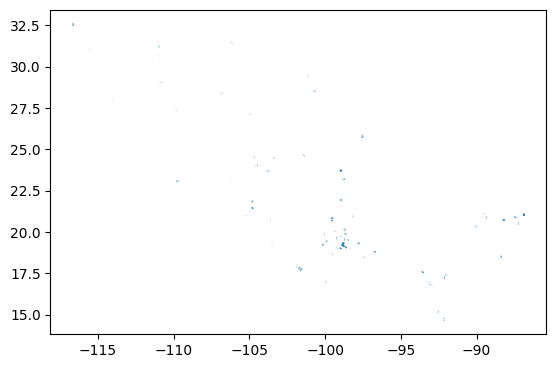

In [333]:
nuevos_ID.plot()

In [354]:
cmexico_cuautla= CF_con_ID.loc[CF_con_ID['NOMBRE']=='mexico-cuautla']

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:644: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


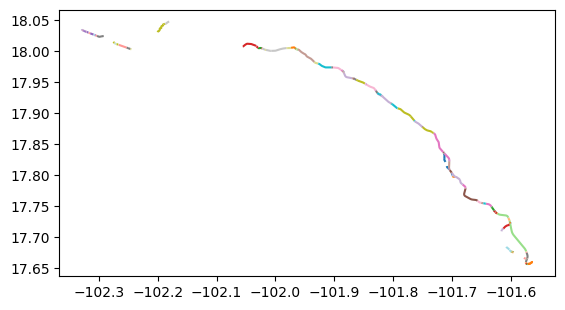

In [348]:
ax=cmexico_cuautla.plot(colormap='tab20')

In [338]:
original_CF_con_ID = CF_todas_simp.loc[(CF_todas_simp['NOMBRE']!='nd')]

In [355]:
cmexico_cuautla2= original_CF_con_ID.loc[original_CF_con_ID['NOMBRE']=='mexico-cuautla']

<Axes: >

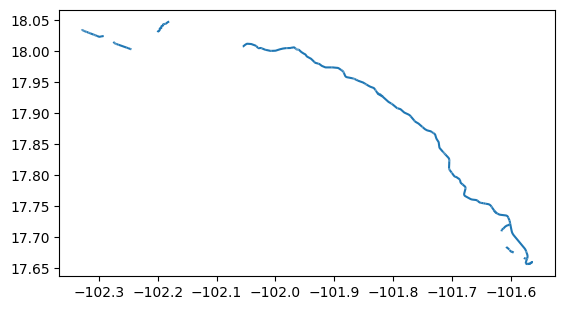

In [346]:

cmexico_cuautla2.plot(axi,)


<Axes: >

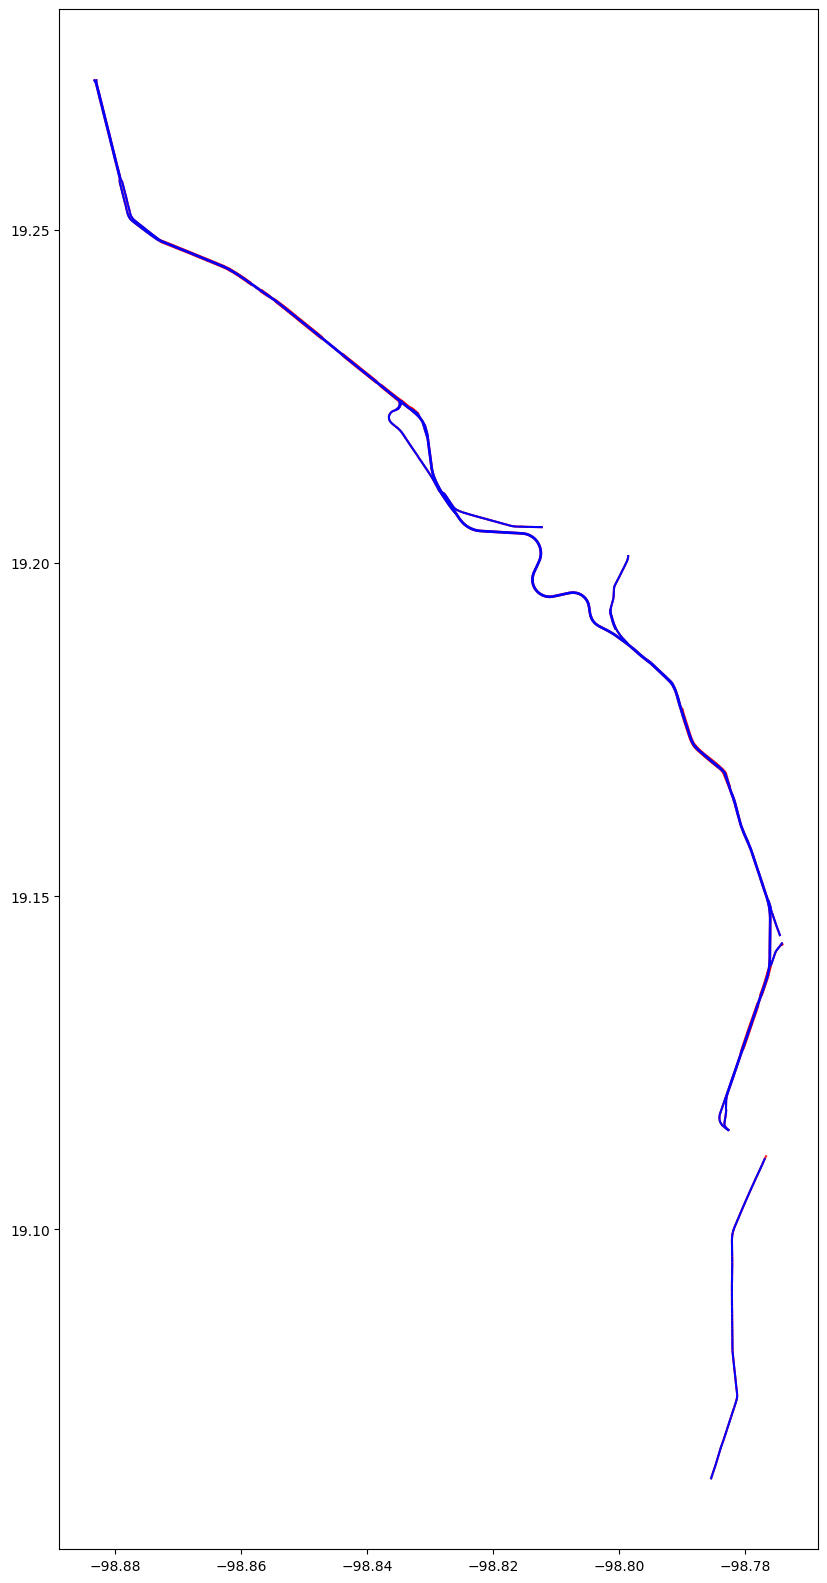

In [359]:
axis = cmexico_cuautla.plot(color='red',figsize=(40,20))
cmexico_cuautla2.plot(ax=axis, color='blue',figsize=(40,20))